### Data preprocessing

In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Loading the dataset with correct divider

In [301]:
df = pd.read_csv('./Dataset/bank-full.csv', delimiter=';')
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


#### Checking for missing values

In [302]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


#### Checking for duplicate values

In [303]:
print(df.duplicated().sum())  # Count the number of duplicate rows

0


#### Identify the datatypes

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [305]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Getting the numerical values

In [306]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


#### Getting the Categorical values

In [307]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


#### Checking for the Boolean values

In [308]:
boolean_columns = df.select_dtypes(include=['bool']).columns
print("Boolean Columns:", boolean_columns)

Boolean Columns: Index([], dtype='object')


#### Indentifying the unique values for each columns one by one

In [309]:
df['job'].unique()
df['marital'].unique()
df['education'].unique()
df['default'].unique()
df['housing'].unique()
df['contact'].unique()
df['month'].unique()
df['poutcome'].unique()
df['y'].unique()
df['campaign'].unique()


array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

#### Checking whether y depends on contact feature

##### To determine if the feature is important, chi2_contingency test is used to evaluate independence of the two categorical variables.

In [310]:
from scipy.stats import chi2_contingency

# If p value is < 0.05, the feature is influencing the targeted variable

crosstab = pd.crosstab(df['contact'], df['y'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 1035.714225356292
p-value: 1.251738325340638e-225


##### As we can see the p value is extremely small. that means this feature extremely influences the targeted variable


#### Check for poutcome feature

In [311]:
crosstab = pd.crosstab(df['poutcome'], df['y'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 4391.5065887686615
p-value: 0.0


#### Encoding the Y variable and Checking the correlation between the numerical features

In [312]:
from scipy.stats import pointbiserialr

# Step 1: Convert 'y' to numeric (binary)
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Step 2: Define numerical features
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Step 3: Calculate Point-Biserial Correlation for each feature
correlation_results = []
for col in numerical_features:
    corr, p_value = pointbiserialr(df[col], df['y'])
    correlation_results.append((col, corr, p_value))

# Step 4: Print results
print("Feature-wise Point-Biserial Correlation and p-values:")
for feature, corr, p_value in correlation_results:
    print(f"Feature: {feature}, Correlation: {corr:.3f}, p-value: {p_value:.3f}")

Feature-wise Point-Biserial Correlation and p-values:
Feature: age, Correlation: 0.025, p-value: 0.000
Feature: balance, Correlation: 0.053, p-value: 0.000
Feature: day, Correlation: -0.028, p-value: 0.000
Feature: duration, Correlation: 0.395, p-value: 0.000
Feature: campaign, Correlation: -0.073, p-value: 0.000
Feature: pdays, Correlation: 0.104, p-value: 0.000
Feature: previous, Correlation: 0.093, p-value: 0.000


#### Plotting the correlation in a heatmap for better visualization

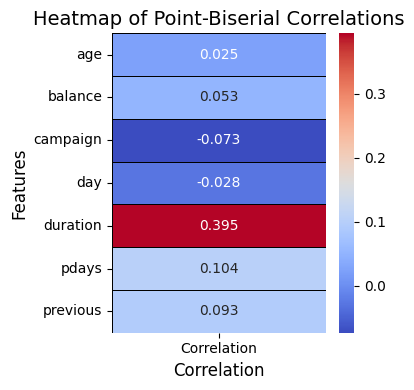

In [313]:
import seaborn as sns

# Convert correlation results to a DataFrame
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Correlation', 'p_value'])

# Create a pivot for heatmap visualization (correlation coefficients)
heatmap_data = correlation_df.pivot_table(values='Correlation', index=['Feature'])

# Plot heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True, fmt='.3f', linewidths=0.6, linecolor='black')
plt.title('Heatmap of Point-Biserial Correlations', fontsize=14)
plt.xlabel('Correlation', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()

# Display the heatmap
plt.show()


##### By analysing the correlation, we can see that day feature does a very less impact in the prediction. So removing it will be a better option. Same as that the month column has similar characteristic. considering that it can be removed

### Kernel Density estimattion thecnique is sued to plot the relationship between age and y features

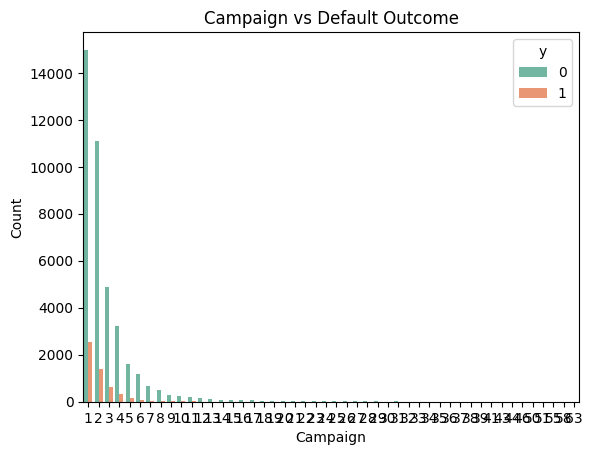

In [314]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for the 'campaign' variable (discrete) and binary target 'y'
sns.countplot(x='campaign', hue='y', data=df, palette='Set2')

plt.title('Campaign vs Default Outcome')
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.show()


In [315]:
import pandas as pd

# Assuming df is your DataFrame with 'campaign' and 'y' columns
campaign_counts = df.groupby('campaign')['y'].value_counts().unstack(fill_value=0)

# Display the result
print(campaign_counts)

y             0     1
campaign             
1         14983  2561
2         11104  1401
3          4903   618
4          3205   317
5          1625   139
6          1199    92
7           688    47
8           508    32
9           306    21
10          252    14
11          185    16
12          151     4
13          127     6
14           89     4
15           80     4
16           77     2
17           63     6
18           51     0
19           44     0
20           42     1
21           34     1
22           23     0
23           22     0
24           19     1
25           22     0
26           13     0
27           10     0
28           16     0
29           15     1
30            8     0
31           12     0
32            8     1
33            6     0
34            5     0
35            4     0
36            4     0
37            2     0
38            3     0
39            1     0
41            2     0
43            3     0
44            1     0
46            1     0
50        

In [316]:
df = df.drop(columns=['day', 'month'])

#### Check for outliers using box plot for numerical  values


<Axes: xlabel='y', ylabel='duration'>

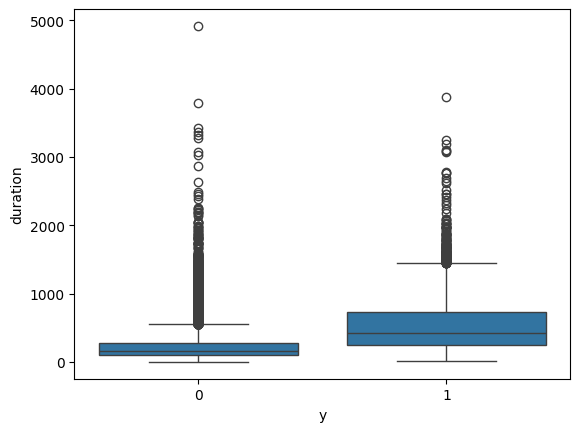

In [317]:
sns.boxplot(x='y', y='duration', data=df)

##### As we can see there's no negative values here. so we can use it as it is.

<Axes: xlabel='y', ylabel='age'>

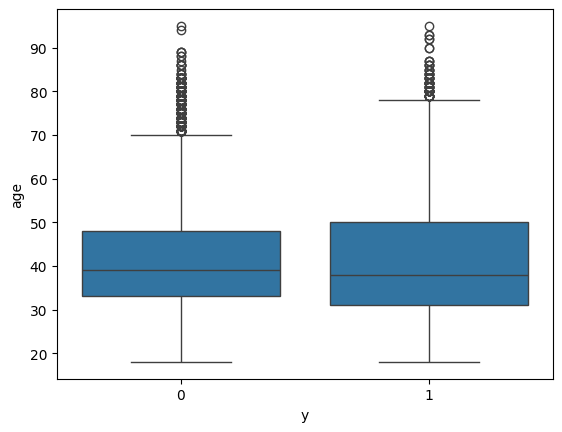

In [318]:
sns.boxplot(x='y', y='age', data=df)

##### There are some extreme values. though those are accpetable. so it can be used directly

<Axes: xlabel='y', ylabel='balance'>

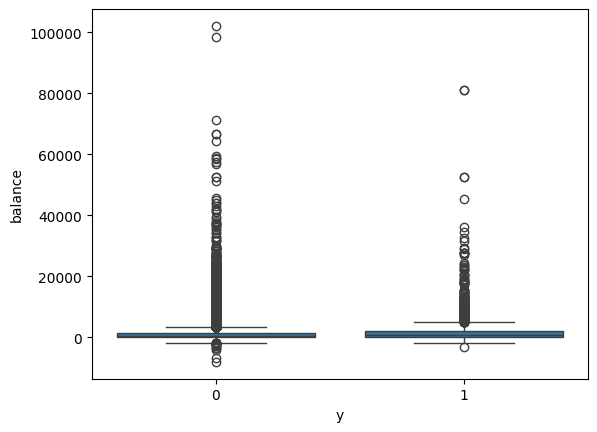

In [319]:
sns.boxplot(x='y', y='balance', data=df)

##### there are negative values as well as extreme values. in this case both can  be accepted. extreme values can be there on some circumstances. for negative values, it can be considered as credits. so can be applied directly

<Axes: xlabel='y', ylabel='previous'>

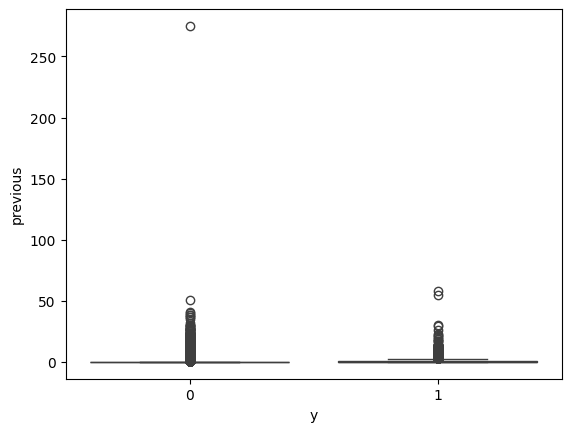

In [320]:
sns.boxplot(x='y', y='previous', data=df)

##### Removing that one outlier

In [321]:
# Identify the record with the extreme value in 'previous'
outlier_row = df[df['previous'] > 250]

# Display the details of the record
print("Outlier row details:")
print(outlier_row)

# Drop the specific row
df = df.drop(outlier_row.index)

# Verify the row is removed
print(f"Updated dataset shape: {df.shape}")

Outlier row details:
       age         job  marital education default  balance housing loan  \
29182   40  management  married  tertiary      no      543     yes   no   

        contact  duration  campaign  pdays  previous poutcome  y  
29182  cellular       349         2    262       275    other  0  
Updated dataset shape: (45210, 15)


In [322]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,0


##### Label endcoding is used for the categorical features below. these features are important and also it has only two values. to reduce dimension label encoding is used here

##### A simple heatmap is plotted to understand the importance of the below housing, loan and default features

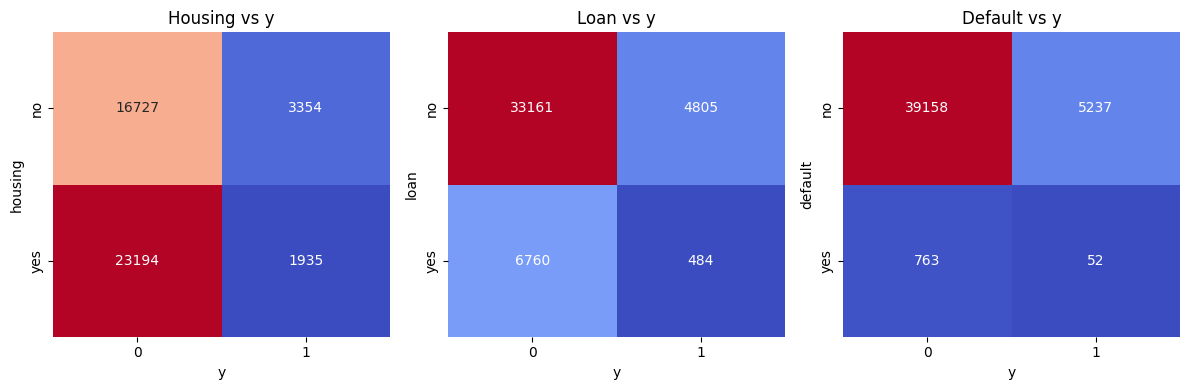

In [323]:
# Create cross-tabulation for each feature with 'y'
cross_tab_housing = pd.crosstab(df['housing'], df['y'])
cross_tab_loan = pd.crosstab(df['loan'], df['y'])
cross_tab_default = pd.crosstab(df['default'], df['y'])

# Plot heatmaps
plt.figure(figsize=(12, 4))

# Heatmap for housing feature
plt.subplot(1, 3, 1)
sns.heatmap(cross_tab_housing, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Housing vs y')

# Heatmap for loan feature
plt.subplot(1, 3, 2)
sns.heatmap(cross_tab_loan, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Loan vs y')

# Heatmap for default feature
plt.subplot(1, 3, 3)
sns.heatmap(cross_tab_default, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Default vs y')

plt.tight_layout()
plt.show()


In [324]:
# List of columns to apply Label Encoding to (yes/no columns)
yes_no_columns = ['default', 'housing', 'loan']

# Apply Label Encoding to each of the columns in the list
df[yes_no_columns] = df[yes_no_columns].replace({'yes': 1, 'no': 0})

df.head()

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_17200\3595634537.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_columns] = df[yes_no_columns].replace({'yes': 1, 'no': 0})


,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,198,1,-1,0,unknown,0


##### Doing Label encoding for education. it has a perfect relationship between each unique values. Also it will reduce the dimensionality of the dataset

In [325]:
# Label Encoding
education_mapping = {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}

df['education_encoded'] = df['education'].map(education_mapping)
df = df.drop(columns=['education'])
df.head()

,age,job,marital,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,education_encoded
0,58,management,married,0,2143,1,0,unknown,261,1,-1,0,unknown,0,2
1,44,technician,single,0,29,1,0,unknown,151,1,-1,0,unknown,0,1
2,33,entrepreneur,married,0,2,1,1,unknown,76,1,-1,0,unknown,0,1
3,47,blue-collar,married,0,1506,1,0,unknown,92,1,-1,0,unknown,0,3
4,33,unknown,single,0,1,0,0,unknown,198,1,-1,0,unknown,0,3


#### Encoding for job feature

In [326]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

<Figure size 1000x600 with 0 Axes>

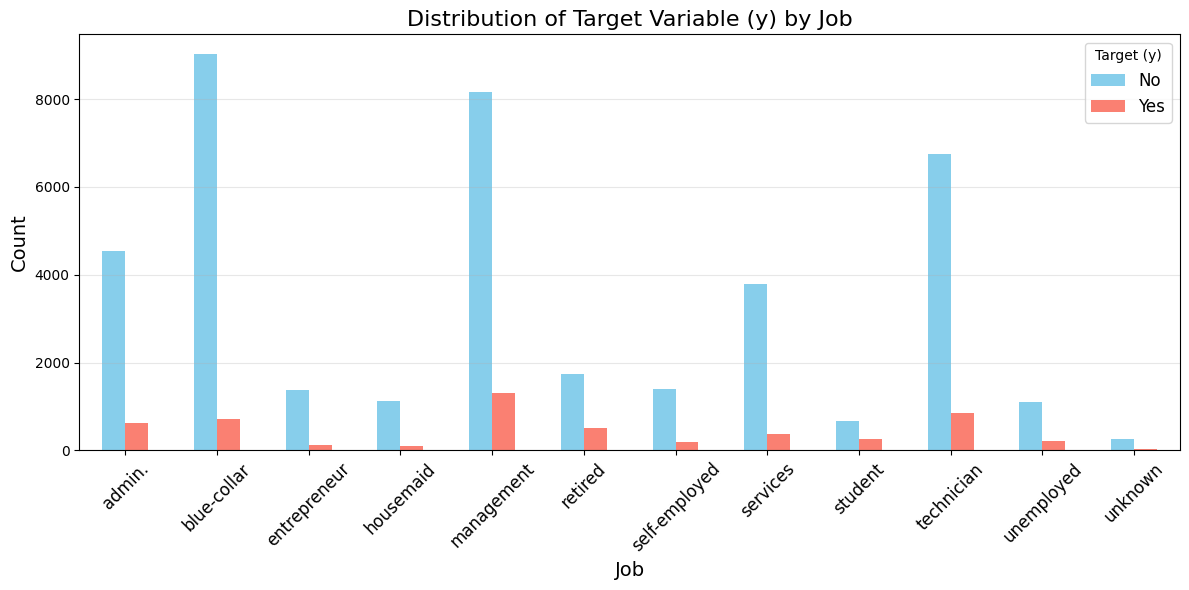

In [327]:
# Grouped bar plot for job and y
plt.figure(figsize=(10, 6))

# Create a crosstab of job vs y
job_y_crosstab = pd.crosstab(df['job'], df['y'])

# Plot the grouped bar chart
job_y_crosstab.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])

plt.title("Distribution of Target Variable (y) by Job", fontsize=16)
plt.xlabel("Job", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(["No", "Yes"], title="Target (y)", fontsize=12)
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()


##### This feature plays a crucial role on the trget variable. the perfect approach to this feature is one hot encoding which will treat each category independently

In [328]:
# Apply One-Hot Encoding to the 'job' column
df_encoded = pd.get_dummies(df['job'], prefix='job')

# Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

# Optionally, concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'job' column
df.drop('job', axis=1, inplace=True)

df.head()

,age,marital,default,balance,housing,loan,contact,duration,campaign,pdays,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,0,2143,1,0,unknown,261,1,-1,...,0,0,1,0,0,0,0,0,0,0
1,44,single,0,29,1,0,unknown,151,1,-1,...,0,0,0,0,0,0,0,1,0,0
2,33,married,0,2,1,1,unknown,76,1,-1,...,1,0,0,0,0,0,0,0,0,0
3,47,married,0,1506,1,0,unknown,92,1,-1,...,0,0,0,0,0,0,0,0,0,0
4,33,single,0,1,0,0,unknown,198,1,-1,...,0,0,0,0,0,0,0,0,0,1


#### One hot encoding the contact column

In [329]:
# Apply One-Hot Encoding to the 'contact' column
df_encoded = pd.get_dummies(df['contact'], prefix='contact')

# Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

# concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'contact' column
df.drop('contact', axis=1, inplace=True)

df.head()

,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,married,0,2143,1,0,261,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
1,44,single,0,29,1,0,151,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
2,33,married,0,2,1,1,76,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
3,47,married,0,1506,1,0,92,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
4,33,single,0,1,0,0,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,1


In [330]:
from scipy.stats import chi2_contingency

# If p value is < 0.05, the feature is influencing the targeted variable

crosstab = pd.crosstab(df['poutcome'], df['y'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 4391.55947194763
p-value: 0.0


In [331]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'poutcome' column
df['poutcome_encoded'] = label_encoder.fit_transform(df['poutcome'])

df.drop('poutcome', axis=1, inplace=True)

# Display the resulting DataFrame
print(df)

       age   marital  default  balance  housing  loan  duration  campaign  \
0       58   married        0     2143        1     0       261         1   
1       44    single        0       29        1     0       151         1   
2       33   married        0        2        1     1        76         1   
3       47   married        0     1506        1     0        92         1   
4       33    single        0        1        0     0       198         1   
...    ...       ...      ...      ...      ...   ...       ...       ...   
45206   51   married        0      825        0     0       977         3   
45207   71  divorced        0     1729        0     0       456         2   
45208   72   married        0     5715        0     0      1127         5   
45209   57   married        0      668        0     0       508         4   
45210   37   married        0     2971        0     0       361         2   

       pdays  previous  ...  job_self-employed  job_services  job_student  

#### marital will also play a huge role on prediction. so treating them indpendently will be a boost in the model. so one hot encoding is more suitable here

In [332]:
from scipy.stats import chi2_contingency

# If p value is < 0.05, the feature is influencing the targeted variable

crosstab = pd.crosstab(df['marital'], df['y'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 196.45890449554065
p-value: 2.185198674532852e-43


In [333]:
# Apply One-Hot Encoding to the 'marital' column
df_encoded = pd.get_dummies(df['marital'], prefix='marital')

# Convert boolean columns to integers (1 for True, 0 for False)
df_encoded = df_encoded.astype(int)

# Concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'marital' column
df.drop('marital', axis=1, inplace=True)

# Display the resulting DataFrame
print(df)

       age  default  balance  housing  loan  duration  campaign  pdays  \
0       58        0     2143        1     0       261         1     -1   
1       44        0       29        1     0       151         1     -1   
2       33        0        2        1     1        76         1     -1   
3       47        0     1506        1     0        92         1     -1   
4       33        0        1        0     0       198         1     -1   
...    ...      ...      ...      ...   ...       ...       ...    ...   
45206   51        0      825        0     0       977         3     -1   
45207   71        0     1729        0     0       456         2     -1   
45208   72        0     5715        0     0      1127         5    184   
45209   57        0      668        0     0       508         4     -1   
45210   37        0     2971        0     0       361         2    188   

       previous  y  ...  job_technician  job_unemployed  job_unknown  \
0             0  0  ...               0

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45210
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45210 non-null  int64
 1   default            45210 non-null  int64
 2   balance            45210 non-null  int64
 3   housing            45210 non-null  int64
 4   loan               45210 non-null  int64
 5   duration           45210 non-null  int64
 6   campaign           45210 non-null  int64
 7   pdays              45210 non-null  int64
 8   previous           45210 non-null  int64
 9   y                  45210 non-null  int64
 10  education_encoded  45210 non-null  int64
 11  job_admin.         45210 non-null  int32
 12  job_blue-collar    45210 non-null  int32
 13  job_entrepreneur   45210 non-null  int32
 14  job_housemaid      45210 non-null  int32
 15  job_management     45210 non-null  int32
 16  job_retired        45210 non-null  int32
 17  job_self-employed

#### Finally all the Transformation, datahandling, feature selections are done. Now a Neural netowrk model is built using tensorflow library. then datas were split and trained.

Epoch 1/70


c:\Users\Thinkpad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


905/905 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7754 - loss: 10.5529 - val_accuracy: 0.8193 - val_loss: 0.6455
Epoch 2/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8555 - loss: 0.8660 - val_accuracy: 0.8784 - val_loss: 0.3774
Epoch 3/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8603 - loss: 0.8419 - val_accuracy: 0.8443 - val_loss: 0.5140
Epoch 4/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8650 - loss: 0.6214 - val_accuracy: 0.8835 - val_loss: 0.6854
Epoch 5/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8627 - loss: 0.6453 - val_accuracy: 0.8532 - val_loss: 0.7747
Epoch 6/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8682 - loss: 0.6339 - val_accuracy: 0.8829 - val_loss: 0.6307
Epoch 7/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8638 - loss: 0.6097 - val_accuracy: 0.8835 - val_loss: 0.7724
Epoch 8/70
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8678 - loss: 0.6246 - val_accuracy: 0.8851 - va

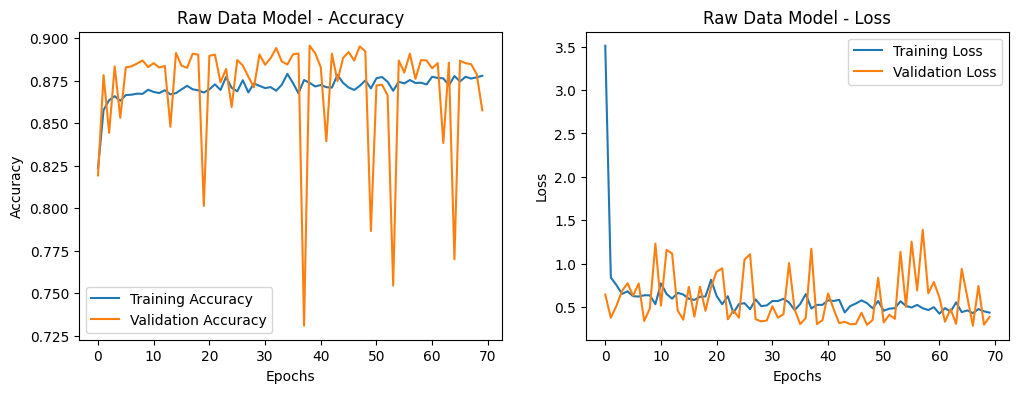

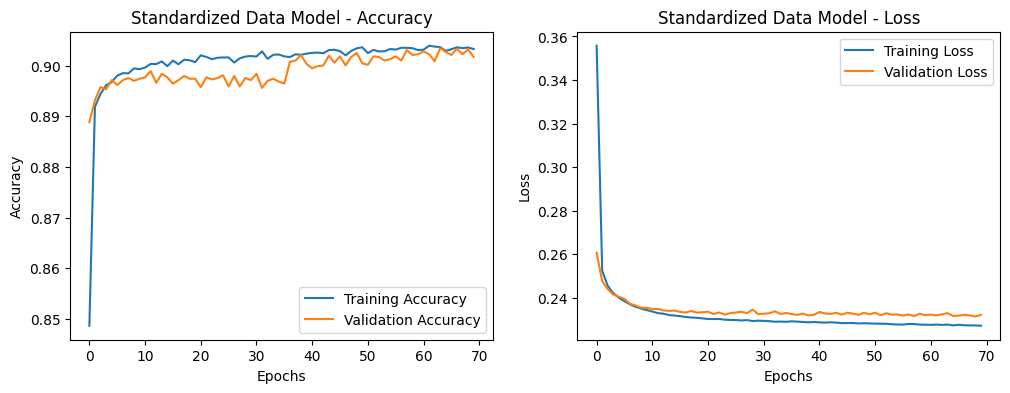

In [335]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Features (all columns except 'y')
X = df.drop('y', axis=1).values  
y = df['y'].values

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model architecture (both models will be the same)
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer with 10 neurons
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model on raw data (without standardization)
model_raw = build_model()
history_raw = model_raw.fit(X_train, y_train, epochs=70, batch_size=32, validation_split=0.2, verbose=1)

# Train the model on standardized data (with standardization)
model_scaled = build_model()
history_scaled = model_scaled.fit(X_train_scaled, y_train, epochs=70, batch_size=32, validation_split=0.2, verbose=1)

# Plotting the graphs
def plot_history(history, title):
    # Plot Accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot for the raw data model
plot_history(history_raw, 'Raw Data Model')

# Plot for the standardized data model
plot_history(history_scaled, 'Standardized Data Model')


#### Evaluating the model

In [336]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on raw data
test_loss_raw, test_accuracy_raw = model_raw.evaluate(X_test, y_test)
print(f"Test Accuracy (Raw Data): {test_accuracy_raw * 100:.2f}%")

# Evaluate the model on standardized data
test_loss_scaled, test_accuracy_scaled = model_scaled.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy (Standardized Data): {test_accuracy_scaled * 100:.2f}%")

# Make predictions and evaluate using sklearn (both raw and standardized data)
y_pred_raw = (model_raw.predict(X_test) > 0.5).astype("int32")
y_pred_scaled = (model_scaled.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluation metrics for raw data
print("\nClassification Report (Raw Data):")
print(classification_report(y_test, y_pred_raw))
print("\nConfusion Matrix (Raw Data):")
print(confusion_matrix(y_test, y_pred_raw))

# Evaluation metrics for standardized data
print("\nClassification Report (Standardized Data):")
print(classification_report(y_test, y_pred_scaled))
print("\nConfusion Matrix (Standardized Data):")
print(confusion_matrix(y_test, y_pred_scaled))


283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8609 - loss: 0.3988
Test Accuracy (Raw Data): 86.54%
283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8967 - loss: 0.2393
Test Accuracy (Standardized Data): 89.84%
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Classification Report (Raw Data):
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      7949
           1       0.43      0.38      0.40      1093

    accuracy                           0.87      9042
   macro avg       0.67      0.65      0.66      9042
weighted avg       0.86      0.87      0.86      9042


Confusion Matrix (Raw Data):
[[7415  534]
 [ 683  410]]

Classification Report (Standardized Data):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7949
           1       0.62      0.42      0.50      1093

    accuracy                           0.90      9042
   macro avg

#### Parameter tuning by increasing hidden layers and decreasing epoch

c:\Users\Thinkpad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7581 - loss: 2.5757 - val_accuracy: 0.8822 - val_loss: 0.5016
Epoch 2/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8612 - loss: 0.7853 - val_accuracy: 0.8754 - val_loss: 0.4438
Epoch 3/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8654 - loss: 0.7427 - val_accuracy: 0.6877 - val_loss: 1.5853
Epoch 4/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8638 - loss: 0.7180 - val_accuracy: 0.8649 - val_loss: 0.3964
Epoch 5/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8753 - loss: 0.4963 - val_accuracy: 0.8854 - val_loss: 0.3827
Epoch 6/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8796 - loss: 0.4483 - val_accuracy: 0.8891 - val_loss: 0.3267
Epoch 7/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8703 - loss: 0.5349 - val_accuracy: 0.8891 - val_loss: 0.3194
Epoch 8/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8744 - loss: 0.5187 - val_accuracy:

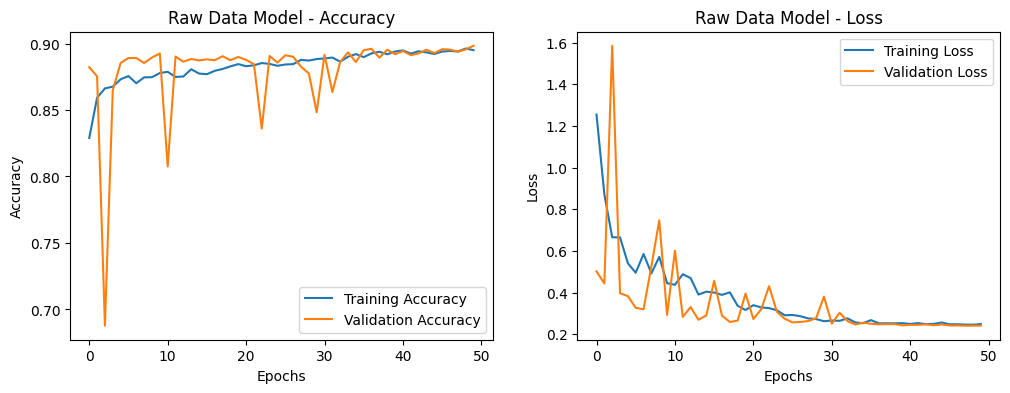

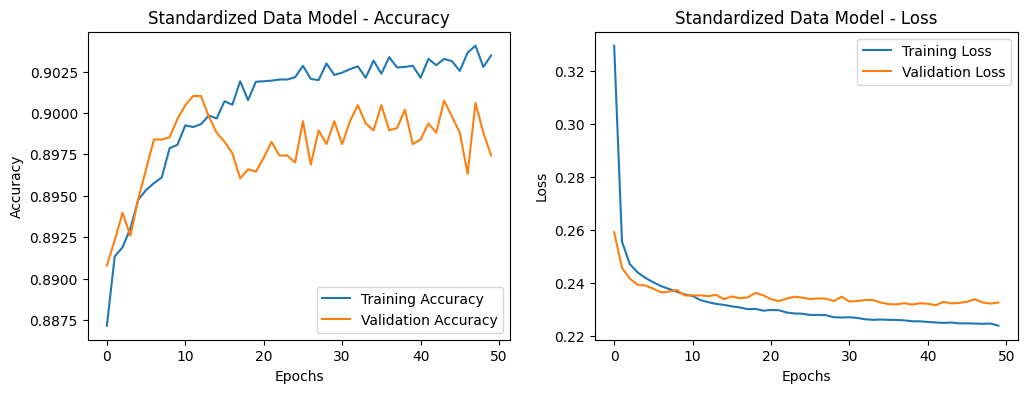

In [339]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Features (all columns except 'y')
X = df.drop('y', axis=1).values  
y = df['y'].values

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model architecture (both models will be the same)
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer with 10 neurons
        tf.keras.layers.Dense(15, activation='relu'),  # Second Hidden layer with 10 neurons
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model on raw data (without standardization)
model_raw = build_model()
history_raw = model_raw.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Train the model on standardized data (with standardization)
model_scaled = build_model()
history_scaled = model_scaled.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Plotting the graphs
def plot_history(history, title):
    # Plot Accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot for the raw data model
plot_history(history_raw, 'Raw Data Model')

# Plot for the standardized data model
plot_history(history_scaled, 'Standardized Data Model')


#### Then evaluate the model

In [341]:
from sklearn.metrics import  classification_report, confusion_matrix

# Evaluate the model on raw data
test_loss_raw, test_accuracy_raw = model_raw.evaluate(X_test, y_test)
print(f"Test Accuracy (Raw Data): {test_accuracy_raw * 100:.2f}%")

# Evaluate the model on standardized data
test_loss_scaled, test_accuracy_scaled = model_scaled.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy (Standardized Data): {test_accuracy_scaled * 100:.2f}%")

# Make predictions and evaluate using sklearn (both raw and standardized data)
y_pred_raw = (model_raw.predict(X_test) > 0.5).astype("int32")
y_pred_scaled = (model_scaled.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluation metrics for raw data
print("\nClassification Report (Raw Data):")
print(classification_report(y_test, y_pred_raw))
print("\nConfusion Matrix (Raw Data):")
print(confusion_matrix(y_test, y_pred_raw))

# Evaluation metrics for standardized data
print("\nClassification Report (Standardized Data):")
print(classification_report(y_test, y_pred_scaled))
print("\nConfusion Matrix (Standardized Data):")
print(confusion_matrix(y_test, y_pred_scaled))


283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8858 - loss: 0.2530
Test Accuracy (Raw Data): 88.80%
283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8931 - loss: 0.2460
Test Accuracy (Standardized Data): 89.64%
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report (Raw Data):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7949
           1       0.57      0.28      0.38      1093

    accuracy                           0.89      9042
   macro avg       0.74      0.63      0.66      9042
weighted avg       0.87      0.89      0.87      9042


Confusion Matrix (Raw Data):
[[7720  229]
 [ 784  309]]

Classification Report (Standardized Data):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7949
           1       0.61      0.40      0.48      1093

    accuracy                           0.90      9042
   macro avg